# explorer

In [1]:
%%capture
%run "libraries.ipynb"
%run "pages - individual report.ipynb"

from IPython.html import widgets

page name,editors,co-editors,co-editors/editors,exclusive editors,ranking
Pi,1799,36,0.0200111172874,886,92
Mathematics,1509,35,0.0231941683234,676,75
Fractal,760,33,0.0434210526316,321,60
Triangle,916,30,0.0327510917031,295,90
Astronomy,1239,28,0.0225988700565,583,79
Crystal,622,27,0.0434083601286,229,54
Circle,807,26,0.0322180916976,253,107
Pythagorean theorem,947,25,0.026399155227,330,133
Ellipse,490,24,0.0489795918367,147,107
Parabola,487,23,0.047227926078,146,112


page name,editors,co-editors,co-editors/editors,exclusive editors,ranking
Robot control,17,3,0.176470588235,6,5
Burmester's theory,16,3,0.1875,5,20
Straightedge,59,8,0.135593220339,15,23
Hermite spline,11,2,0.181818181818,2,28
2D geometric model,28,7,0.25,1,42
Ray tracing (graphics),249,18,0.0722891566265,120,43
Parabolic microphone,36,5,0.138888888889,12,44
Computer graphics,241,18,0.0746887966805,95,47
Relative direction,172,12,0.0697674418605,69,49
Crystal,622,27,0.0434083601286,229,54


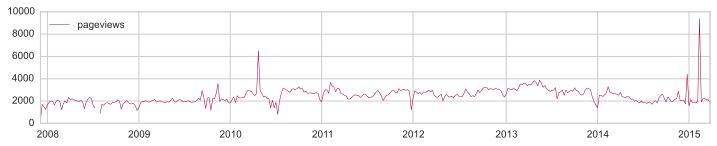

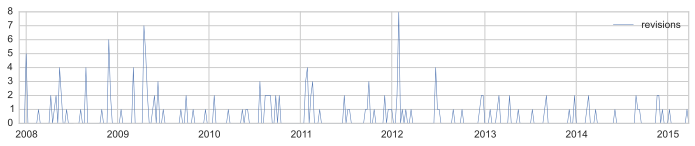

editor name,edits on that page,edits over the corpus
Jorge Stolfi,35,222
Frecklefoot,20,59
Patrick,9,1769
VMS Mosaic,9,12
Blueshade,7,8
The Anome,6,197
Wapcaplet,6,41
ClueBot NG,4,1453
J.delanoy,3,157
RedWolf,3,15


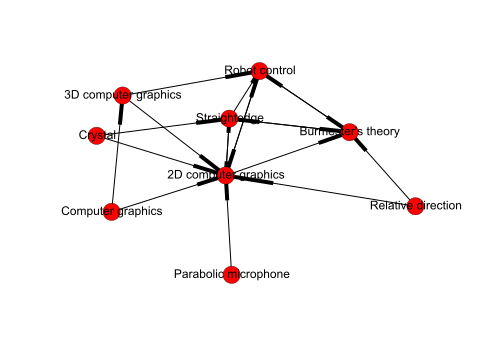

In [2]:
w = widgets.Select(description="page", options=pages)
widgets.interact(display_report, page=w);